# PERFUME RECOMMENDATION SYSTEM

**BUSINESS UNDERSTANDING**

There are two sensible ways to buy perfumes. First is to walk into a store and choose one or alternatively online shopping. Both these methods require a bit of knowledge from the buyer’s end on their likes and dislikes. When purchasing perfumes, a buyer needs to consider the notes of the perfumes which are divided into 3. Notes in perfumery are descriptors of scents that can be sensed upon the application of a perfume. The 3 notes are:-
Top notes which basically last for 5 – 15 minutes, the heart notes also known as middle notes, that will last for 20 – 60 minutes and the base notes which lasts for a minimum of 6 hours. Different notes react differently for each buyer. Depending on the concentration of aromatic oils, a fragrance can go through these stages quickly or last longer. After settling on the different notes, a buyer then needs to settle on a perfume that meets their price range.

## Objectives

The goal of creating the Perfume Recomender System is to ensure perfume novices and perfume experts are able to choose scents they like and create a library of scents after all 'variety is the spice of life'. Our recomender will also be able to provide indicative prices hence the prospective buyer can make budgetary allocations.

# Data Source
 The data is web scraped from https://cierraperfumes.com/ website.
The data contains 9 columns and 2479 rows.

Column Name     Description

0 category: specify gender target i.e women, men or unisex

1 title: The name of the perfume

2 price: The price of the perfume

3 link: The specific location path on Cierra website

4 image: The image of the specific perfume

5 description: A synopsis of the perfume

6 top: The initial scent, lasting 5-15 minutes.

7 middle: The core of the fragrance, emerging after the top notes dissipate

8 base: The final lingering notes, which emerge after the middle notes fade and can last several hours.

# Data Understanding

### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
#reading data
file_path = '../Data/cierra_updated.csv'
df = pd.read_csv(file_path)
df.head()

,category,title,price,link,image,description,top,middle,base
0,Women,"Aberchrombie & Fitch, Authentic Away Edp 100Ml...","KSh10,900.00",https://cierraperfumes.com/product/aberchrombi...,https://i0.wp.com/cierraperfumes.com/wp-conten...,"The journey is a trip, but the destination is ...","Top Notes: Brazilian Mandarin, Red Currant, Pear","Heart Notes: Plush Pink Freesia, Muguet and Ja...","Base Notes: Warm Praline, Amber, Musk"
1,Women,"Aberchrombie & Fitch, Authentic Night Edp 100Ml W","KSh7,400.00",https://cierraperfumes.com/product/aberchrombi...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Authentic Night for Women is for the woman who...,Fragrance Notes:,"A mouth-watering combination of Black Currant,...",NaN
2,Women,"Aberchrombie & Fitch, Authentic Night Edp 100M...","KSh9,100.00",https://cierraperfumes.com/product/aberchrombi...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Authentic Night by Abercrombie & Fitch 100ml E...,3 Piece Set Includes:,– 100ml Eau De Parfum Spray– 200ml Perfumed Bo...,Authentic Night for Women is for the woman who...
3,Women,"AFNAN, 9AM EDP 100ML W","KSh6,500.00",https://cierraperfumes.com/product/afnan-9am-e...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Afnan 9am perfume for women is a fruity-spicy ...,"Top Notes: Mandarin, Cedrat, Cardamom and Pink...","Middle Notes: Lavender, Orange Blossom, Rose a...","Base Notes: Cedarwood, Moss, Patchouli and Musk"
4,Women,"AFNAN, VIOLET BOUQUET EDP 100ML W","KSh7,300.00",https://cierraperfumes.com/product/afnan-viole...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Violet Bouquet is an opulent signature scent o...,"Top notes: Sweet, Woody, Saffron, Citrus.","Middle notes: Aromatic, Amber, Orange, Citrus ...","Base notes: Fresh Spicy, Ambergris, Oak Moss, ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2479 non-null   object
 1   title        2479 non-null   object
 2   price        2478 non-null   object
 3   link         2479 non-null   object
 4   image        2477 non-null   object
 5   description  2340 non-null   object
 6   top          1920 non-null   object
 7   middle       1530 non-null   object
 8   base         1233 non-null   object
dtypes: object(9)
memory usage: 174.4+ KB


## Data Cleaning

In [5]:
df.isnull().values.sum()

2896

In [8]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

image             2
description     139
top             559
middle          949
base           1246
dtype: int64


In [7]:
df.duplicated().sum()

0

In [9]:
# Print unique values to verify
print(df['category'].unique())

['Women' 'Men' 'Unisex']


### Dealing with missing values

In [6]:
# Remove "KSh" and commas, then convert to float
df['price'] = df['price'].replace({'KSh': '', ',': ''}, regex=True).astype(float)

# Calculate the median price
median_price = df['price'].median()

# Fill missing prices with the median price
df['price'] = df['price'].fillna(median_price).astype(int)

In [12]:
# Fill missing values in fragrance notes, description and image link with an empty string''
df['top'] = df['top'].fillna('')
df['middle'] = df['middle'].fillna('')
df['base'] = df['base'].fillna('')
df['image'] = df['image'].fillna('')
df['description'] = df['description'].fillna('')

In [13]:
df.isnull().values.sum()

0

In [14]:
df['price'].describe()


count     2479.000000
mean     21627.470754
std      14475.403134
min       3500.000000
25%      11300.000000
50%      17500.000000
75%      28000.000000
max      97500.000000
Name: price, dtype: float64

Based on this summary it shows the data positively skewed.

In [15]:
# Convert text columns to lowercase
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()


In [16]:
# Split fragrance columns by commas, lowercase and clean up notes
df['top_notes'] = df['top'].str.split(',').apply(lambda x: [note.strip().lower() for note in x] if isinstance(x, list) else [])
df['middle_notes'] = df['middle'].str.split(',').apply(lambda x: [note.strip().lower() for note in x] if isinstance(x, list) else [])
df['base_notes'] = df['base'].str.split(',').apply(lambda x: [note.strip().lower() for note in x] if isinstance(x, list) else [])


In [17]:
# Combine fragrance columns into a single column for overall similarity
df['all_notes'] = df['top_notes'] + df['middle_notes'] + df['base_notes']


# Data Visualization

### Price distribution of perfumes

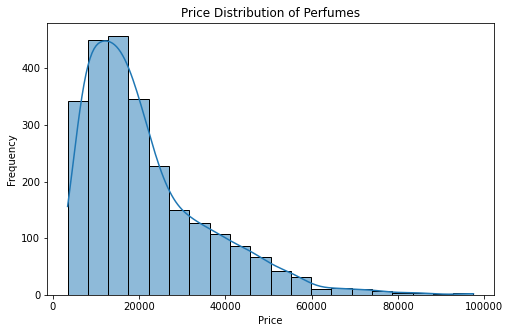

In [18]:
# Histogram of prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Price Distribution of Perfumes")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [191]:
# Flatten the 'top_notes', 'middle_notes', and 'base_notes' columns into one list of notes
all_notes = df['top_notes'].explode().tolist() + df['middle_notes'].explode().tolist() + df['base_notes'].explode().tolist()

# Count the frequency of each note using Counter
note_counts = Counter(all_notes)

# Convert to DataFrame for better readability
note_counts_df = pd.DataFrame(note_counts.items(), columns=['Note', 'Count'])

# Sort by count in descending order
note_counts_df = note_counts_df.sort_values(by='Count', ascending=False)

# Display the most common notes
print(note_counts_df.head(10))

           Note  Count
12      unknown   2754
104        musk    125
316   patchouli    112
185     vanilla    105
236     jasmine    104
98     bergamot    100
50        amber     98
535  sandalwood     92
105     vetiver     73
59         rose     65


Most Common Fragrance Notes

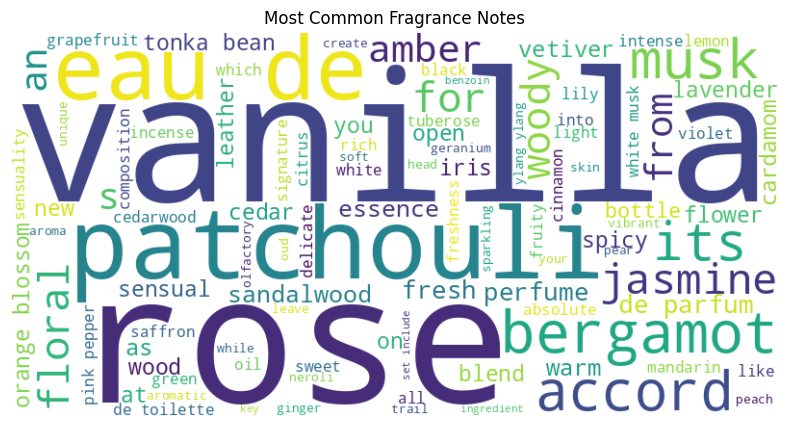

In [192]:

# Define a set of stopwords to remove common non-informative words
stopwords = set(['and','in','of', 'it', 'i','is','are','this', 'to','middle','scent', 'top','base', 'by', 'a', 'notes', 'the', 'heart', 'base', 'the heart', 'that', 'with', 'note', 'unknown', 'fragrance'])

# Combine all notes into one string
all_notes = ' '.join(df['all_notes'].explode().values)

# Generate the word cloud with the specified adjustments
wordcloud = WordCloud(
    stopwords=stopwords,          # Remove specified stopwords
    width=800,                    # Set width of the word cloud
    height=400,                   # Set height of the word cloud
    background_color='white',     # Set background color
    colormap='viridis',           # Set color map
    max_words=100               # Limit to top 100 words
).generate(all_notes)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Fragrance Notes")
plt.show()

## Price Distribution for specific note

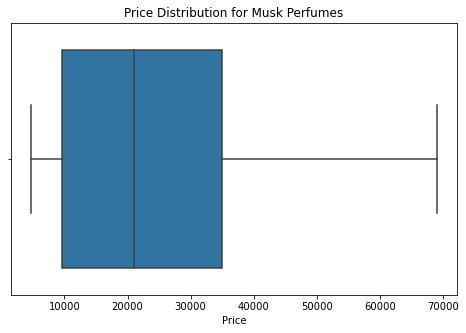

In [19]:
# Filter perfumes containing a specific note and plot their prices
Patchouli_perfumes = df[df['all_notes'].apply(lambda x: 'musk' in x)]
plt.figure(figsize=(8, 5))
sns.boxplot(x=Patchouli_perfumes['price'])
plt.title("Price Distribution for Musk Perfumes")
plt.xlabel("Price")
plt.show()

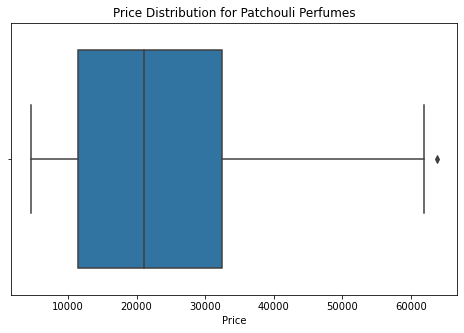

In [20]:
# Filter perfumes containing a specific note and plot their prices
Patchouli_perfumes = df[df['all_notes'].apply(lambda x: 'patchouli' in x)]
plt.figure(figsize=(8, 5))
sns.boxplot(x=Patchouli_perfumes['price'])
plt.title("Price Distribution for Patchouli Perfumes")
plt.xlabel("Price")
plt.show()

## Count of Perfumes by Category

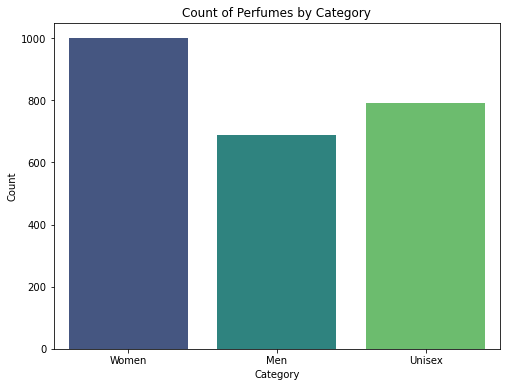

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='category', palette='viridis')
plt.title('Count of Perfumes by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Price Distribution by Category

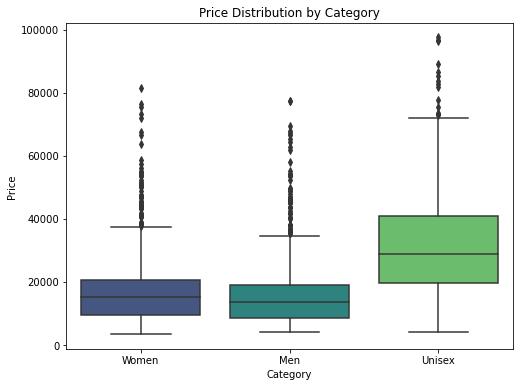

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='category', y='price', palette='viridis')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

## Data Preprocessing


In [23]:
# Ensure all entries in 'all_notes' are strings and split into lists for one-hot encoding
df['all_notes'] = df['all_notes'].fillna("").astype(str).apply(lambda x: x.split(', '))

# Initialize the one-hot encoder for all_notes
mlb = MultiLabelBinarizer()

# Fit and transform 
note_features = mlb.fit_transform(df['all_notes'])

# Create a DataFrame with the one-hot encoded notes
note_features_df = pd.DataFrame(note_features, columns=mlb.classes_)

# Concatenate the one-hot encoded notes back to the original DataFrame
df = pd.concat([df, note_features_df], axis=1)

In [24]:
# Initialize label encoder for category
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df['category_encoded'] = label_encoder.fit_transform(df['category'])
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category encoding:", category_mapping)

Category encoding: {'Men': 0, 'Unisex': 1, 'Women': 2}


## Item based recommendation system

In [26]:
# Normalize 'price'
scaler = MinMaxScaler()
df['normalized_price'] = scaler.fit_transform(df[['price']])
# Define X and Y features
X = df[['all_notes', 'category_encoded', 'normalized_price']]
y = df['title']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform 'all_notes' column using MultiLabelBinarizer on X_train
mlb = MultiLabelBinarizer()
X_train_notes = mlb.fit_transform(X_train['all_notes'])
X_test_notes = mlb.transform(X_test['all_notes'])  # Use transform to keep consistency with X_train

# Convert `category_encoded` and `normalized_price` to sparse matrices for compatibility
X_train_category = csr_matrix(X_train[['category_encoded']].values)
X_test_category = csr_matrix(X_test[['category_encoded']].values)
X_train_price = csr_matrix(X_train[['normalized_price']].values)
X_test_price = csr_matrix(X_test[['normalized_price']].values)

# Combine features into a single sparse matrix
X_train_combined = hstack([csr_matrix(X_train_notes), X_train_category, X_train_price])
X_test_combined = hstack([csr_matrix(X_test_notes), X_test_category, X_test_price])

# Calculate cosine similarity for recommendations
# We calculate similarity between each test item and all training items
cosine_sim_matrix = cosine_similarity(X_test_combined, X_train_combined)

# Define recommendation function using similarity scores
def recommend_from_test(test_index, top_n=5):
    # Get similarity scores for the specified test item against all train items
    sim_scores = list(enumerate(cosine_sim_matrix[test_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Retrieve indices of top recommendations
    top_indices = [i[0] for i in sim_scores[:top_n]]

    # Return recommendations from y_train based on top similar items
    recommendations = y_train.iloc[top_indices]
    return recommendations

# Get recommendations for the first test item
test_index = 0  # specify which test instance you want to get recommendations for
print("Recommendations for Test Item:", y_test.iloc[test_index])
print(recommend_from_test(test_index))


c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_label.py:875: UserWarning: unknown class(es) ["'1 miss dior blooming eau de toilette – refillable travel spray 10ml'", "'10 ml'", "'10 ml. housed in a white leather case'", "'100 ml'", "'100 ml']", "'100 ml. both its memorable trail and its recognizable amphora bottle will leave a lasting impression: j’adore is renowned as an emblematic dior fragrance. floral notes of ylang-ylang'", "'100 mlédition noire eau de toilette'", "'100 mlédition noire perfumed shower gel'", "'100ml base perfume'", "'100ml eau de toilette100ml shower gel75ml deo stick'", "'100ml edp']", "'100ml la vie est belle l’eau de parfum'", "'100mlfor her musc noir eau de parfum'", "'10ml'", "'10mlfor her body lotion'", "'15 ml'", "'15ml edp travel perfume']", "'15ml edt']", "'200ml la vie est belle nourishing fragranced body lotion.']", "'3 pieces dolce & gabbana light blue edt']", "'50 ml eau de parfum100 ml body lotion'", "'50ml body lotio

Recommendations for Test Item: bdk parfums, pas ce soir extrait de parfum 100ml u
1924    goldfield & banks australia, purple suede parf...
2305          sospiro perfumes, accento viola edp 100ml u
2035    maison francis kurkdjian, aqua celestia forte ...
2399          tomford, white patchouli absolu edp 100ml u
1760             bdk parfums, vanille leather edp 100ml u
Name: title, dtype: object


The system is able to suggest perfumes that are similar based on a combination of their scent profile (notes), intended audience, and price, offering a more comprehensive recommendation.

## User based recommendation system.

In [27]:
# Ensure all entries in 'all_notes' are strings and split into lists for one-hot encoding
df['all_notes'] = df['all_notes'].fillna("").astype(str).apply(lambda x: x.split(', '))

# Initialize the one-hot encoder for 'all_notes'
mlb = MultiLabelBinarizer()
note_features = mlb.fit_transform(df['all_notes'])
note_features_df = pd.DataFrame(note_features, columns=mlb.classes_)

# Concatenate the one-hot encoded notes back to the original DataFrame
df = pd.concat([df, note_features_df], axis=1)

# Initialize the label encoder for 'category'
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category encoding:", category_mapping)

# Normalize price
scaler = MinMaxScaler()
df['normalized_price'] = scaler.fit_transform(df[['price']])

# Convert 'category_encoded' and 'normalized_price' columns to sparse matrices
category_matrix = csr_matrix(df[['category_encoded']].values)
price_matrix = csr_matrix(df[['normalized_price']].values)

# Combine features into a single matrix using sparse matrices (ensure it's csr_matrix)
features_matrix = hstack([csr_matrix(note_features), category_matrix, price_matrix]).tocsr()

# Recommendation function
def recommend_perfume_by_note_gender_price(note, gender, price_range, num_recommendations=5):
    # Map gender to encoded value
    encoded_gender = category_mapping.get(gender.capitalize())
    if encoded_gender is None:
        return "Invalid gender specified. Please enter 'Women', 'Men', or 'Unisex'."

    # Filter perfumes by gender and price range
    min_price, max_price = price_range
    filtered_df = df[(df['category_encoded'] == encoded_gender) &
                     (df['price'] >= min_price) & (df['price'] <= max_price)]

    # If no perfumes match the criteria, return a message
    if filtered_df.empty:
        return "No perfumes found for the given criteria."

    # Create a query vector for the specified note using the one-hot encoding
    note_vector = pd.Series(0, index=mlb.classes_)
    for n in note.split(', '):
        if n in mlb.classes_:
            note_vector[n] = 1
    note_vector = note_vector.values.reshape(1, -1)

    # Add gender and normalized price to the query vector for similarity calculation
    gender_vector = csr_matrix([[encoded_gender]])
    price_vector = csr_matrix(scaler.transform([[min_price + (max_price - min_price) / 2]]))
    query_vector = hstack([csr_matrix(note_vector), gender_vector, price_vector])

    # Calculate similarity scores between the query and filtered perfumes
    sim_scores = cosine_similarity(query_vector, features_matrix[filtered_df.index, :]).flatten()

    # Get the indices of the top recommendations based on similarity scores
    sim_indices = sim_scores.argsort()[::-1][:num_recommendations]
    recommendations = filtered_df.iloc[sim_indices][['title', 'price', 'category']]

    return recommendations

# User input example
user_note = input("Enter a note you like (e.g., 'vanilla'): ")
user_gender = input("Enter your gender (Women, Men, Unisex): ")
user_min_price = float(input("Enter your minimum price: "))
user_max_price = float(input("Enter your maximum price: "))

# Call the recommendation function
recommended_perfumes = recommend_perfume_by_note_gender_price(
    user_note, user_gender, (user_min_price, user_max_price)
)

# Display recommendations
print(recommended_perfumes)

Category encoding: {'Men': 0, 'Unisex': 1, 'Women': 2}
                                                 title  price category
412       givenchy, l’interdit rouge ultime edp 80ml w  25400    Women
875  the merchant of venice, imperial emerald edp 1...  25500    Women
244                  dior, hypnotic poison edp 100ml w  25100    Women
970               ysl, black opium edp 90ml w gift set  25100    Women
257    dior, miss dior absolutely blooming edp 100ml w  26100    Women


c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


This model deduces its output from;

Notes: The system matches the user's preferred note with the notes of perfumes in the dataset using one-hot encoding.
     
Gender: It ensures the recommendation is relevant for the selected gender (Men, Women, Unisex).

Price: The system filters perfumes within the specified price range before making recommendations.